<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#model" data-toc-modified-id="model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>model</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#import-data" data-toc-modified-id="import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import data</a></span><ul class="toc-item"><li><span><a href="#PCA-data-visualization" data-toc-modified-id="PCA-data-visualization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PCA data visualization</a></span></li><li><span><a href="#transform-data-from-strings-to-numeric-data" data-toc-modified-id="transform-data-from-strings-to-numeric-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>transform data from strings to numeric data</a></span></li><li><span><a href="#prepare-data-for-model" data-toc-modified-id="prepare-data-for-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>prepare data for model</a></span></li></ul></li><li><span><a href="#nn-model1" data-toc-modified-id="nn-model1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>nn model1</a></span><ul class="toc-item"><li><span><a href="#nn_model-#2" data-toc-modified-id="nn_model-#2-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>nn_model #2</a></span></li><li><span><a href="#nn-model-3" data-toc-modified-id="nn-model-3-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>nn model 3</a></span></li></ul></li><li><span><a href="#nn-model-no-SMOTE,-use-weights" data-toc-modified-id="nn-model-no-SMOTE,-use-weights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>nn model no SMOTE, use weights</a></span></li><li><span><a href="#word2vec" data-toc-modified-id="word2vec-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>word2vec</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
#import modules for Obtain/Scrub/Explore
import re
import pandas as pd 
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from collections import Counter

In [2]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# model

In [3]:
# import modules for model
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import random
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,  LabelBinarizer
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import metrics
from keras import models, layers, optimizers, initializers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, Activation, BatchNormalization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import gensim

Using TensorFlow backend.


## functions

In [4]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
#calculate metrics globally by counting the total tp, fn and fp
    precision_score(y_test, y_pred, average='micro')
    print("Micro-precision score")
    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    # precision = tp / (tp + fp)

In [5]:
def model_results(x):
    results_train = x.evaluate(X_train, y_train)
    print('Training:', results_train)
    results_val = x.evaluate(X_val, y_val)
    print('Validation:', results_val)
    results_test = x.evaluate(X_test, y_test)
    print('Test:', results_test)
    

In [6]:
def pre_loss_plot(model_dict):
    p_values = model_dict['precision']
    loss_values = model_dict['loss']
    pv_values = model_dict['val_precision']
    lossv_values = model_dict['val_loss']
    a_values = model_dict['binary_accuracy']
    va_values = model_dict['val_binary_accuracy']

    epochs = range(1, len(loss_values) + 1)

    # Plot the training loss vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, loss_values, 'b', label='Training loss')

    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plot the training precision vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, p_values, 'r', label='Training Precision')


    plt.title('Training Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()
    
     # Plot the training accuracy vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, a_values, 'r', label='Training Accuracy')


    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()
    
    # Plot the training loss vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, lossv_values, 'b', label='Validation loss')

    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
       # Plot the training precision vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, pv_values, 'r', label='Validation Precision')


    plt.title('Training Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()
    
      # Plot the vaildation accuracy vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, va_values, 'r', label='Validation Accuracy')


    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()

In [7]:
# assess metrics of model
def get_metrics(y_test, yhat_classes,yhat_probs):
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes)
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes)
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes)
    print('F1 score: %f' % f1)
# ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)
# confusion matrix
    matrix = confusion_matrix(y_test, yhat_classes)
    print(matrix)

In [8]:
def plot_history(x):
    pd.DataFrame(x.history).plot(figsize=(12,9))
    plt.grid(True)
    plt.title('Training/Validation Loss/Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend(loc='lower right')
    plt.show()

In [9]:
#visualize confusion matrix
def cm_nn(model, X, y, y_pred):
    
    confusion = confusion_matrix(y, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Confusion Matrix"
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# import data

In [10]:
df = pd.read_csv('pn_df.csv')

In [159]:
df.shape

(3403, 9)

## PCA data visualization

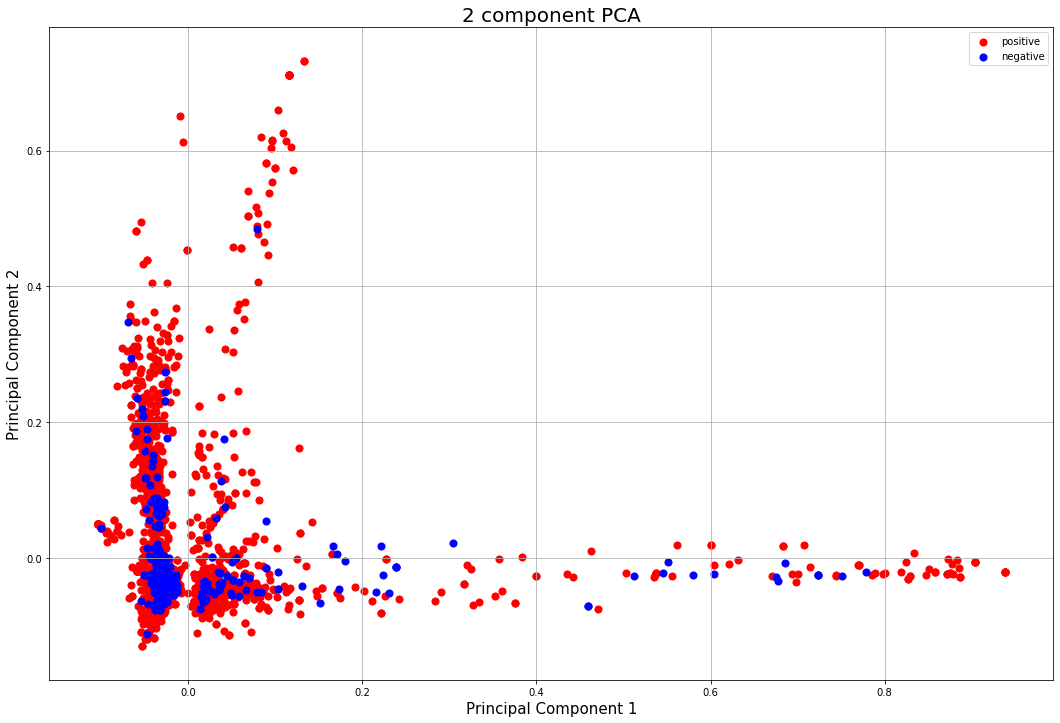

In [11]:
# plot PCA visualization of tokens

g_plot = df.copy()
col = ['wordl', 'sentiment']
g_plot = g_plot[col]
X_p = g_plot['wordl']
y_p = g_plot['sentiment']


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
Xp = pipeline.fit_transform(X_p).todense()

pca = PCA(n_components=2).fit(Xp)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xp)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, g_plot[['sentiment']]], axis = 1)

fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['positive', 'negative']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sentiment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## transform data from strings to numeric data

## prepare data for model 

In [12]:
# convert target data with labelencoder
le = LabelEncoder()
y = df['target'].copy()
le.fit_transform(y)
y = y.astype('category')

In [13]:
X = df.wordl.copy()

In [14]:
#X = [" ".join(t) for t in df.tokenl]
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y_train)


In [15]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (681,)
Train label shape: (2449,)
Validation label shape: (273,)
Test shape: (681,)
Train shape: (2449,)
Validation shape: (273,)


In [16]:
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,3))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), ])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense() 
X_val = pipeline.transform(X_val).todense()


In [17]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (681,)
Train label shape: (2449,)
Validation label shape: (273,)
Test shape: (681, 28966)
Train shape: (2449, 28966)
Validation shape: (273, 28966)


In [18]:
counter = Counter(y_train)
print(counter)

Counter({1: 2058, 0: 391})


In [19]:
# apply smote to dataset due to imbalance of pos vs neg sentiment
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 2058, 0: 2058})


In [20]:
# verify new shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

Test label shape: (681,)
Train label shape: (4116,)
Test shape: (681, 28966)
Train shape: (4116, 28966)
Counter({1: 2058, 0: 2058})
28966


In [21]:
# parameters need to be defined, kernel initializers and regularizers applied. 
# assess layer structure, depth and width
# assess neurons 
# batch normalization
# dropout layers
# batch size and epochs
# activation function
# learning rate
# loss function & parameters

# nn model1 

In [22]:
# initializers with seed for reproducability
# for relu activated layer
initializer = keras.initializers.he_normal(seed=1)

# for tanh layer
initializer2 = keras.initializers.glorot_normal(seed=1)

# regularizer to minimize overfitting
regularizer = keras.regularizers.l2(0.01)

# early stopping callback to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

#define optimizer and learningrate/learning rate 
nad_opt = optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
ad_opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8)
sgd_opt = optimizers.SGD(lr=1e-6, momentum=0.9, nesterov=True)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
# create pyramid shaped sequential model

model1_2 = models.Sequential()

# activation layer 
model1_2.add(layers.Dense(500, input_dim=count_terms, activation='relu', 
                          kernel_initializer=initializer))
model1_2.add(layers.BatchNormalization(momentum=0.8))   
# add relu activated hidden layers
model1_2.add(layers.Dense(300, activation='relu', ))
                          
# add relu activated hidden layers
model1_2.add(layers.Dense(100, activation='relu'))   
  
# add relu activated hidden layers
model1_2.add(layers.Dense(64,))   

model1_2.add(layers.Dense(6, ))  

# output layer with sigmoid activation for binary target
model1_2.add(layers.Dense(1, activation='sigmoid'))
#metrics
precision = keras.metrics.Precision(name='precision', thresholds=[0.9])
ba = keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=1.8)
# use bce loss function for binary classification 
model1_2.compile(optimizer=ad_opt, loss='binary_crossentropy', metrics=[ba, precision])

In [31]:
# Train the model 
predictions1_2 = model1_2.fit(X_train,
                    y_train,
                    epochs=256,
                    callbacks=[es_callback],
                    batch_size=96,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=0
                    
                    )
                    

In [32]:
model1_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               14483500  
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000      
_________________________________________________________________
dense_8 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [33]:
m1_dict2 =  predictions1_2.history
m1_dict2.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'val_precision', 'loss', 'binary_accuracy', 'precision'])

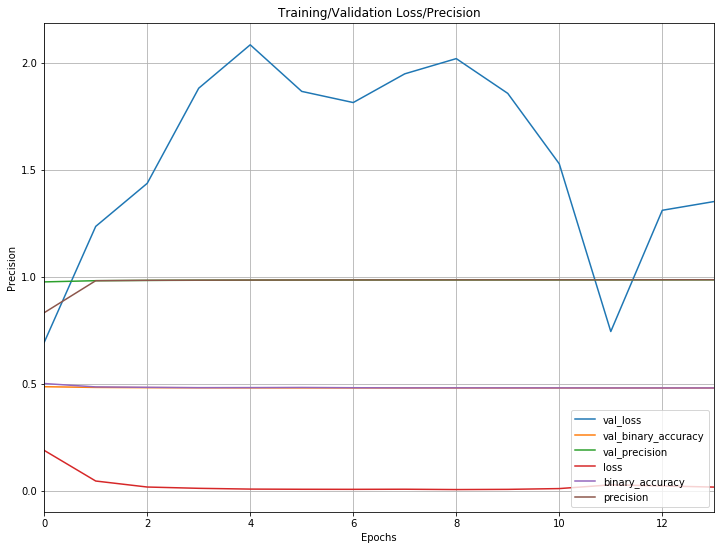

In [34]:
plot_history(predictions1_2)

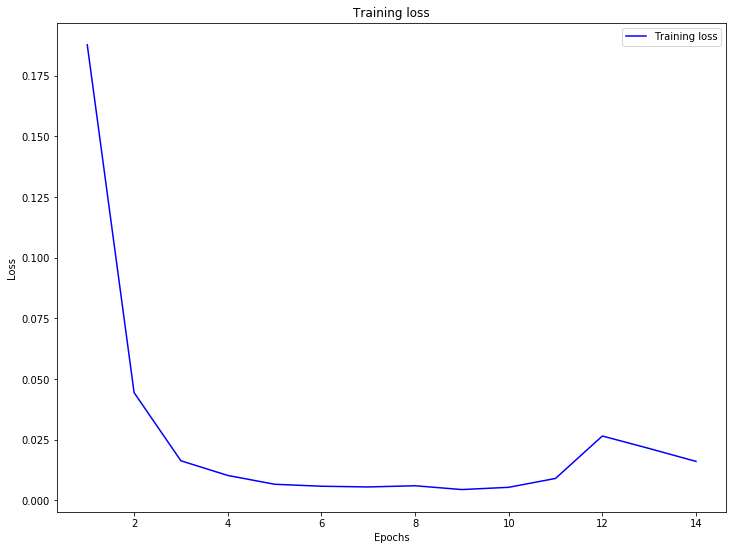

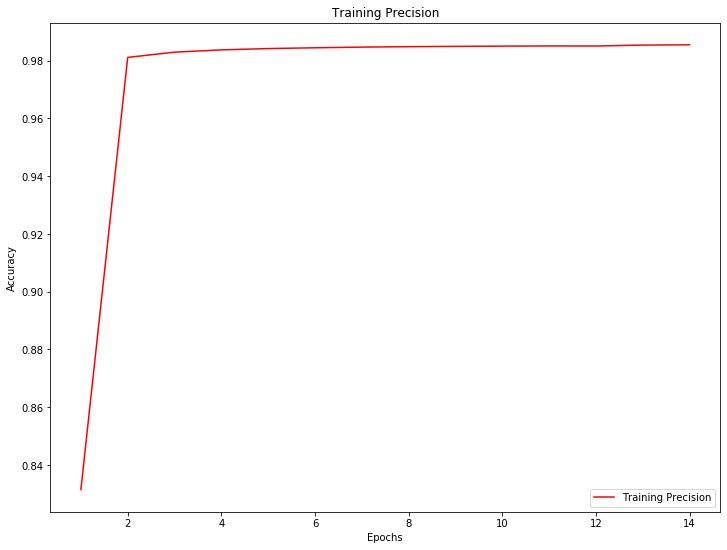

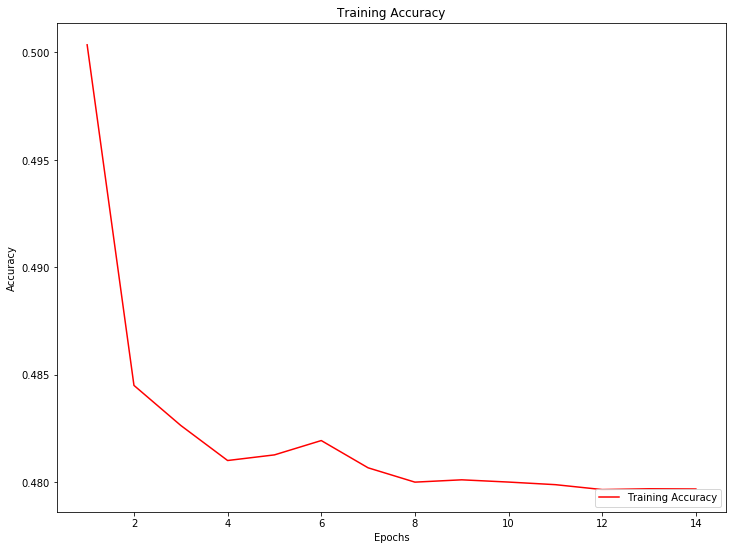

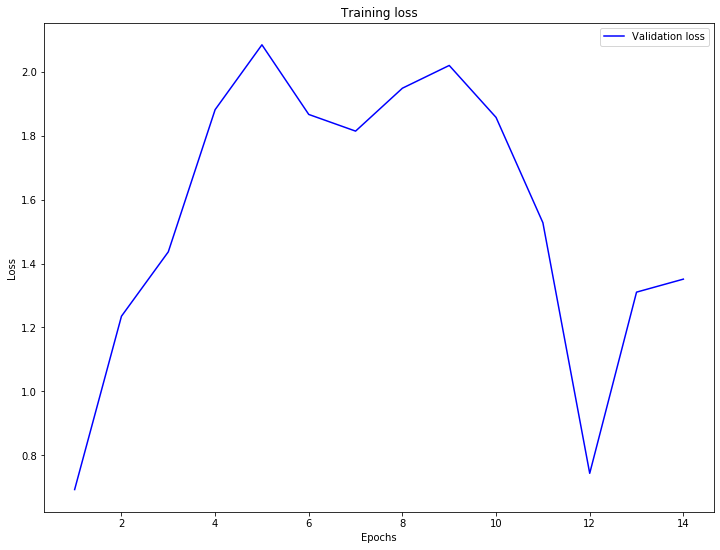

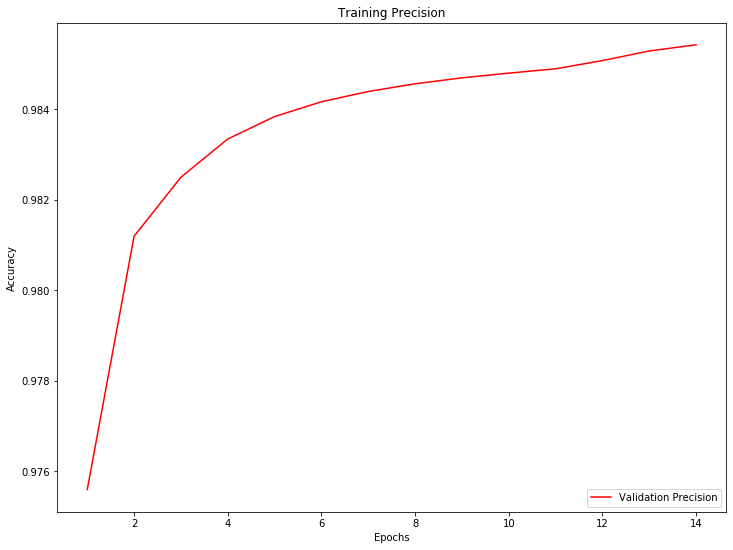

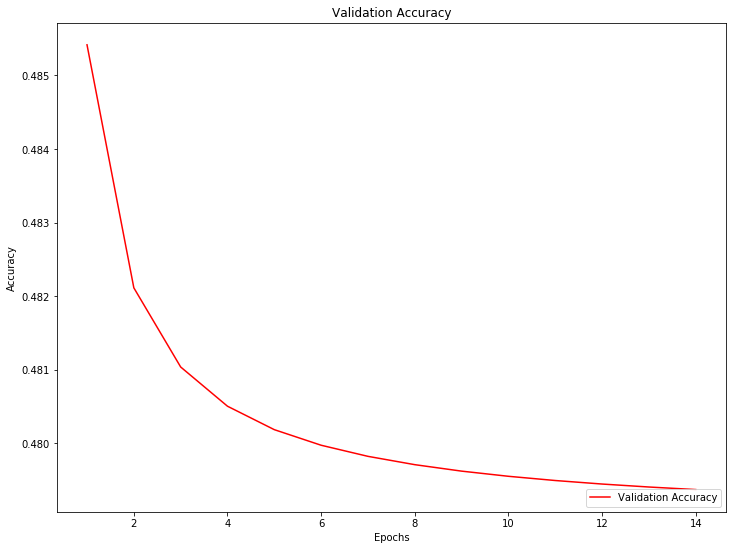

In [35]:
pre_loss_plot(m1_dict2)

In [36]:
model_results(model1_2)

4116/4116 [==============================] - 2s 367us/step
Training: [0.005154536780535688, 0.4732307195663452, 0.9858214855194092]
273/273 [==============================] - 0s 386us/step
Validation: [1.3511046699551872, 0.47949525713920593, 0.9856833219528198]
681/681 [==============================] - 0s 499us/step
Test: [1.3655110429780948, 0.47719430923461914, 0.9842657446861267]


In [37]:
# predict probabilities for test set
yhat_probs = model1_2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1_2.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [38]:
# assess metrics of model
get_metrics(y_test, yhat_classes, yhat_probs)

Accuracy: 0.870778
Precision: 0.874613
Recall: 0.987762
F1 score: 0.927750
ROC AUC: 0.810924
[[ 28  81]
 [  7 565]]


In [39]:
#update_state(y_test, y_classes, sample_weight=3)

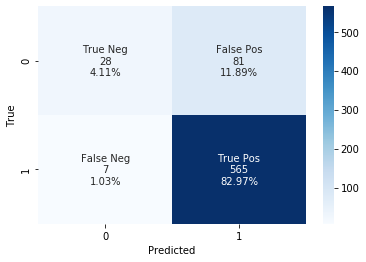

In [40]:
cm_nn(model1_2, X_test, y_test,yhat_classes)

## nn_model #2 

In [41]:
# create pyramid shaped sequential model
model2 = models.Sequential()
# activation layer 
model2.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
model2.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
model2.add(layers.Dense(1, activation='sigmoid'))# create sequential model


In [42]:
# Compile the model
# early stopping to prevent overfitting changed to training loss rather than val_loss
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=5)
#metrics
precision = keras.metrics.Precision(name='precision', thresholds=0.85)
ba = keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=2.5)

# use bce loss function for binary classification 
model2.compile(optimizer=ad_opt, loss='binary_crossentropy', metrics=[ba, precision])

In [43]:
# Train the model 
predictions3 = model2.fit(X_train,
                    y_train,
                    epochs=256,
                    callbacks=[es_callback],
                    batch_size=96,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=0
                    
                    )

In [44]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 300)               8690100   
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 8,710,629
Trainable params: 8,710,029
Non-trainable params: 600
_________________________________________________________________


In [45]:
model2_dict = predictions3.history
model2_dict.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'val_precision', 'loss', 'binary_accuracy', 'precision'])

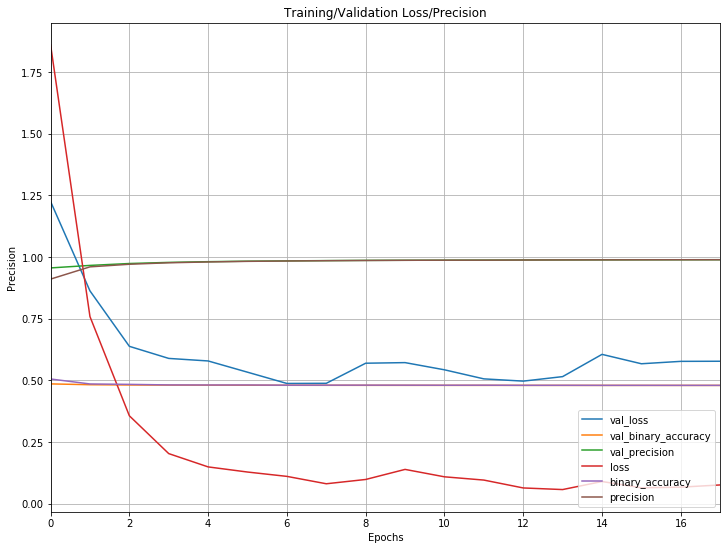

In [46]:
plot_history(predictions3)

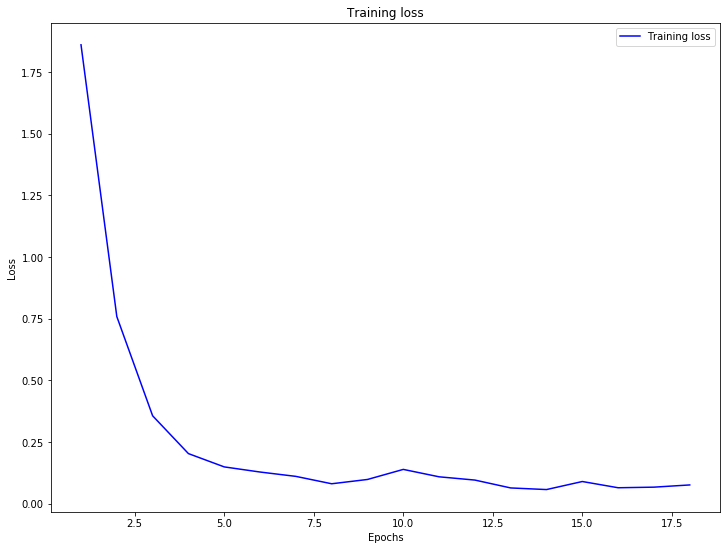

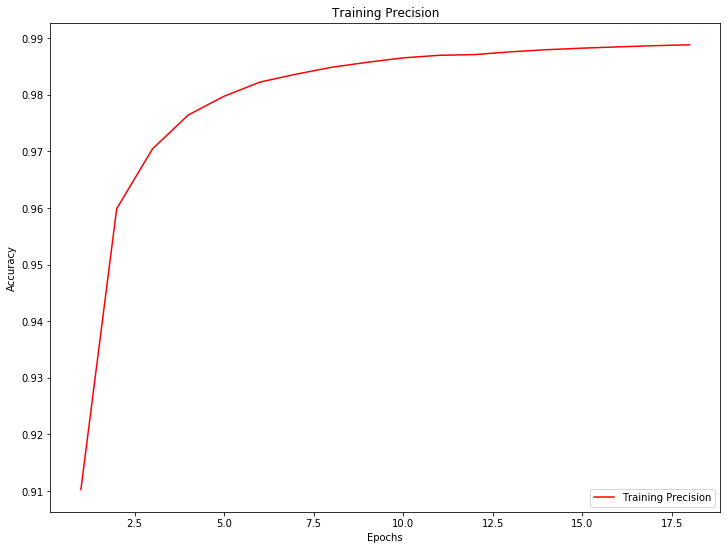

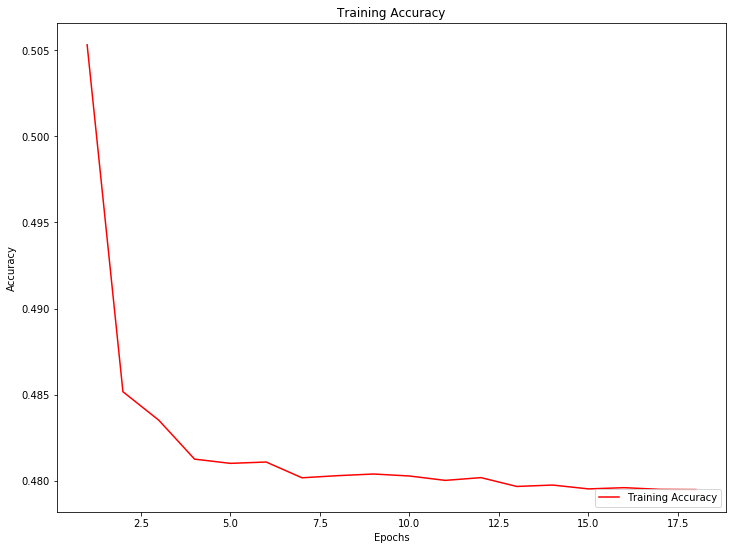

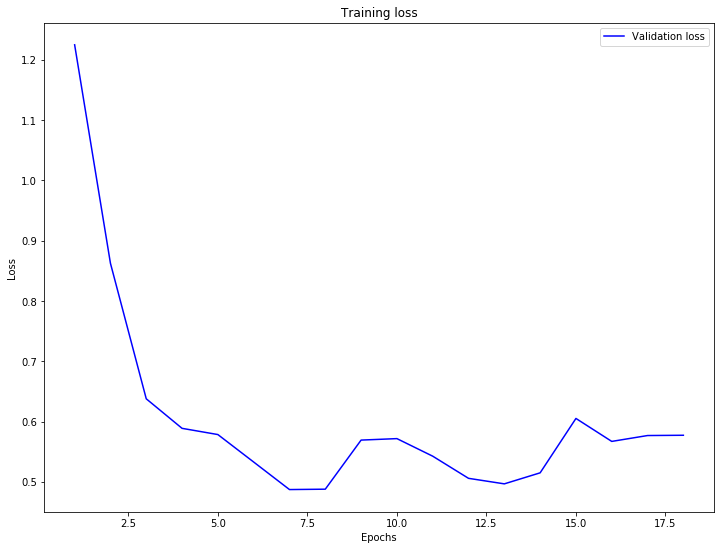

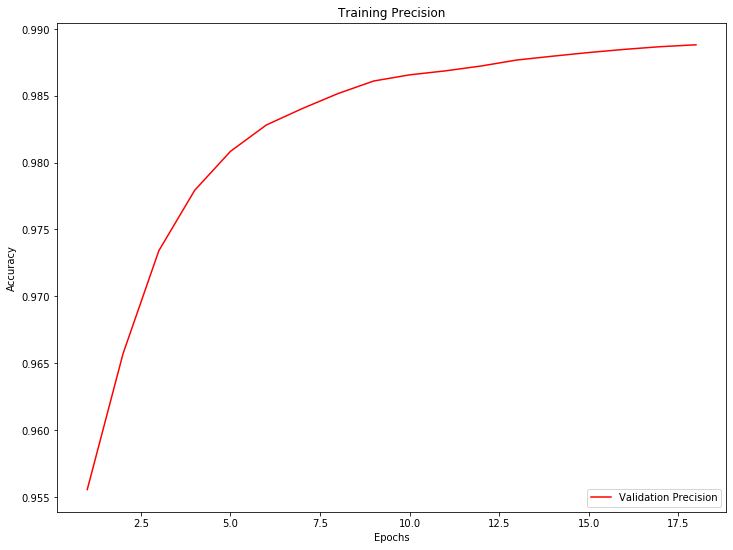

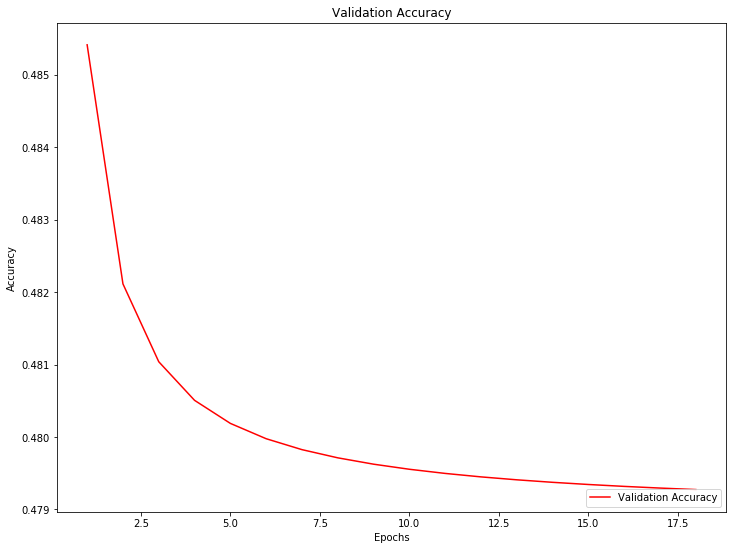

In [47]:
pre_loss_plot(model2_dict)

In [48]:
# Print the loss and accuracy for the training set 
model_results(model2)

4116/4116 [==============================] - 2s 598us/step
Training: [0.09171844840744842, 0.4744628667831421, 0.9890271425247192]
273/273 [==============================] - 0s 643us/step
Validation: [0.5772469755494114, 0.47937488555908203, 0.9888703227043152]
681/681 [==============================] - 0s 602us/step
Test: [0.5626029935877404, 0.477556437253952, 0.988157331943512]


In [49]:
# predict probabilities for test set
yhat_probs = model2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model2.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]


In [50]:
# assess metrics for model
get_metrics(y_test, yhat_classes, yhat_probs)

Accuracy: 0.851689
Precision: 0.895798
Recall: 0.931818
F1 score: 0.913453
ROC AUC: 0.841695
[[ 47  62]
 [ 39 533]]


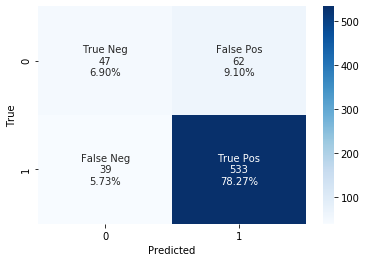

In [51]:
cm_nn(model2, X_test, y_test,yhat_classes)

## nn model 3

In [52]:
regularizer2 = keras.regularizers.l2(0.01)
# create sequential model
model3 = models.Sequential()

# activation layer 
model3.add(layers.Dense(312, input_dim=count_terms, activation='relu',
                        kernel_regularizer=regularizer2))
model3.add(layers.BatchNormalization(momentum=0.8))
model3.add(layers.Dense(96,  activation='relu',))
model3.add(layers.Dense(32,  activation='relu',))
model3.add(layers.BatchNormalization(momentum=0.8))
model3.add(layers.Dense(10,  activation='relu',))
# output layer with sigmoid activation for binary target
model3.add(layers.Dense(1, activation='sigmoid'))

In [53]:
precision = keras.metrics.Precision(name='precision', thresholds=0.9)
ba = keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=1.99)
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=5)

# compile model
model3.compile(optimizer='adagrad', loss="binary_crossentropy", metrics=[precision, ba])

In [54]:
# Train the model 
predictions4 = model3.fit(X_train,
                    y_train,
                    epochs=256,
                    callbacks=[es_callback],
                    batch_size=96,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=0
                    
                         )

In [55]:
model3_dict = predictions4.history
model3_dict.keys()


dict_keys(['val_loss', 'val_precision', 'val_binary_accuracy', 'loss', 'precision', 'binary_accuracy'])

In [56]:
model_results(model3)

4116/4116 [==============================] - 2s 600us/step
Training: [0.06497752379383476, 0.9902732968330383, 0.4742075800895691]
273/273 [==============================] - 0s 632us/step
Validation: [0.7837197531710615, 0.9901629686355591, 0.4793999493122101]
681/681 [==============================] - 0s 645us/step
Test: [0.8494669177108575, 0.9891984462738037, 0.4774809181690216]


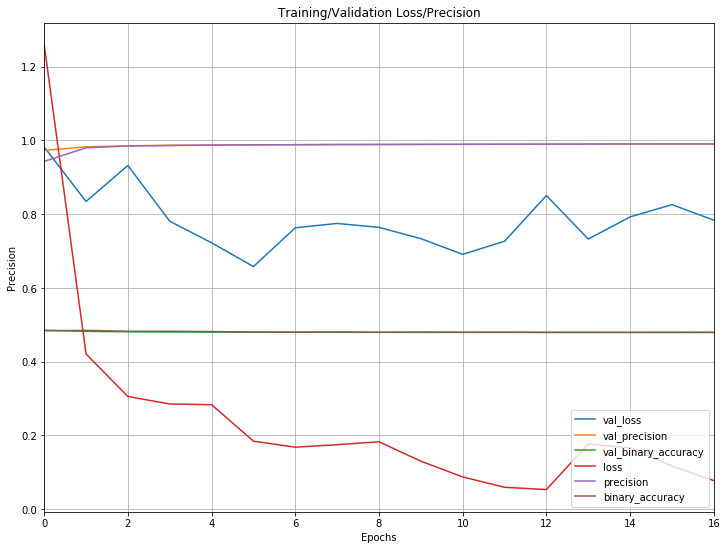

In [57]:
plot_history(predictions4)

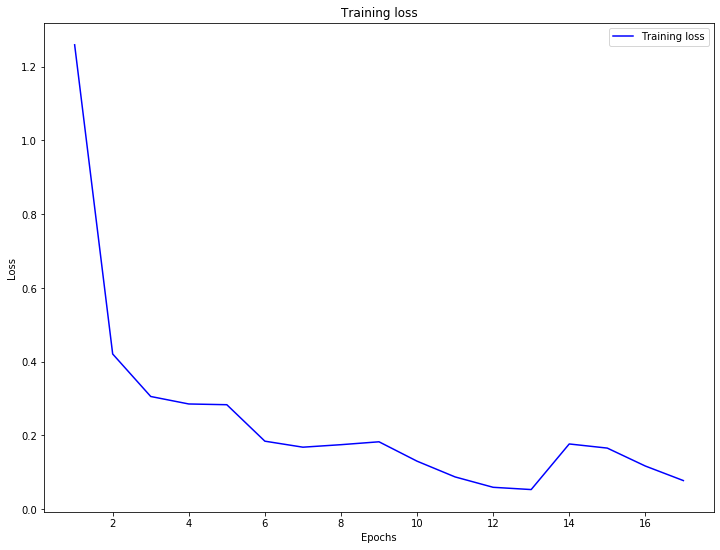

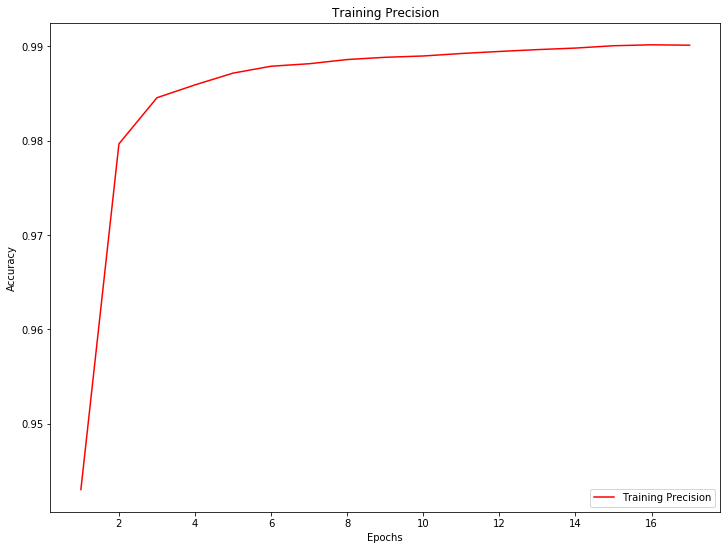

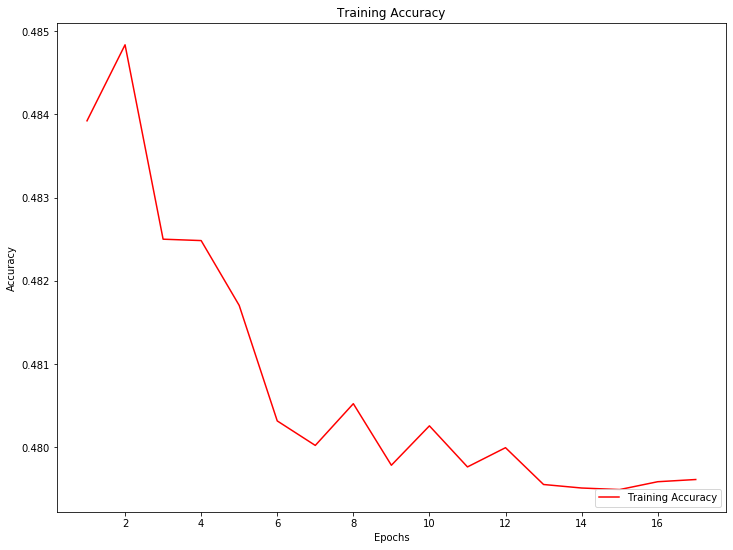

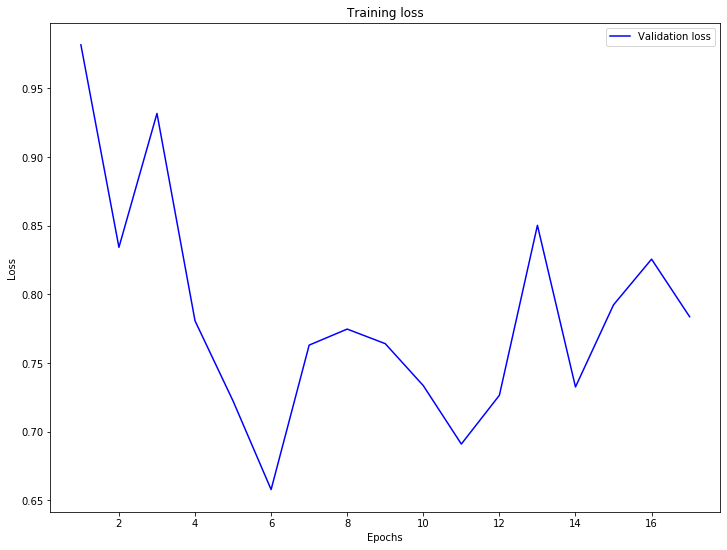

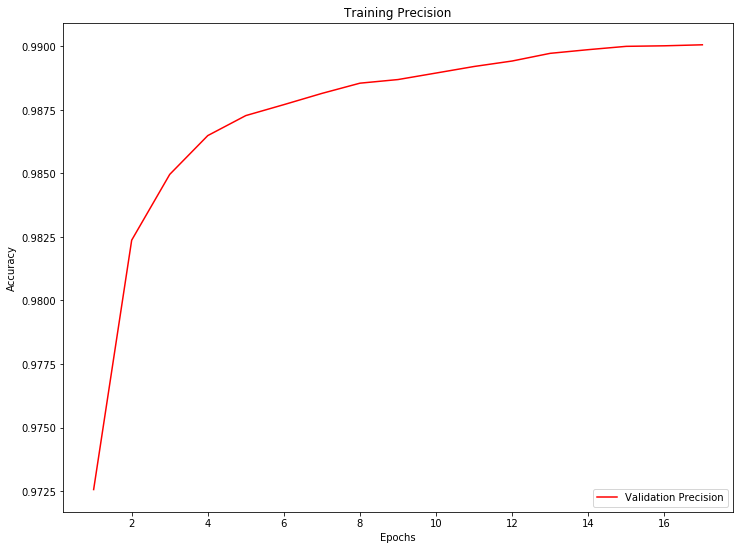

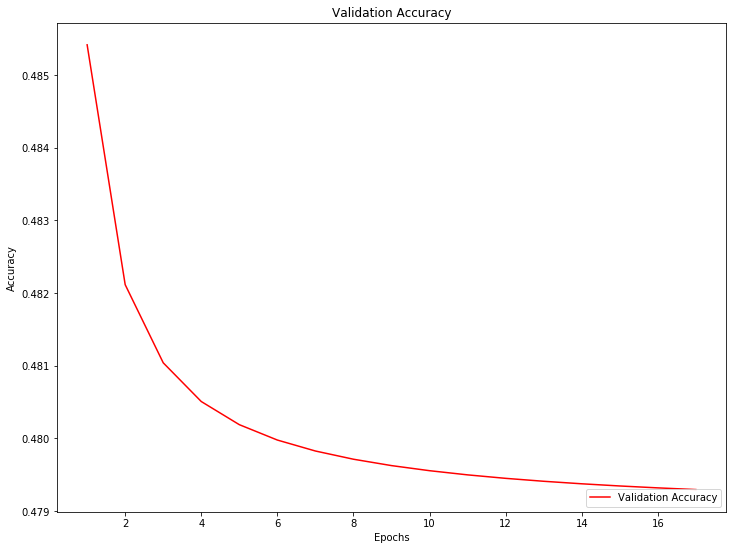

In [58]:
pre_loss_plot(model3_dict)

In [59]:
# Output (probability) predictions for the train set 
y_hat_train = model3.predict(X_train) 


In [60]:
# predict probabilities for test set
yhat_probs = model3.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model3.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [61]:
get_metrics(y_test, yhat_classes,yhat_probs)

Accuracy: 0.861968
Precision: 0.890523
Recall: 0.952797
F1 score: 0.920608
ROC AUC: 0.802608
[[ 42  67]
 [ 27 545]]


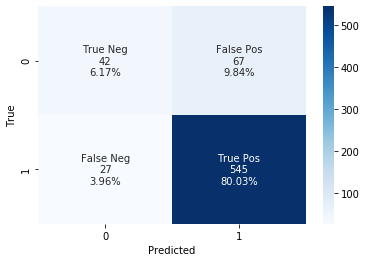

In [62]:
cm_nn(model1_2, X_test, y_test,yhat_classes)

# nn model no SMOTE, use weights

In [112]:
# prepare data
X = df.wordl.copy()

y1 = df['target'].astype('category')
# split data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y1, random_state=42,
                                                     test_size=.2, stratify=y1)

# split data 
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, random_state=42,
                                                     test_size=.1, stratify=y3_train)
# build TFIDF features on tweet with tfidf vectorizer
tfv = TfidfVectorizer(min_df=0.0, max_df=1.0, use_idf=True
                     )
X_train_trans = tfv.fit_transform(X3_train)
xdf = pd.DataFrame(X_train_trans[0].T.todense(),
index=tfv.get_feature_names(), columns=["term"])
xdf = xdf.sort_values('term', ascending=False)
print (xdf.head(25))
X_val_trans = tfv.transform(X3_val)
test_features = tfv.transform(X3_test)
X3_train = X_train_trans
X3_test = test_features
X3_val = X_val_trans

                 term
blow         0.401376
started      0.356031
official     0.321729
site         0.308745
making       0.305078
used         0.305078
version      0.287427
away         0.269040
think        0.237366
apps         0.220076
great        0.209288
app          0.153579
portable     0.000000
porting      0.000000
porn         0.000000
position     0.000000
positioning  0.000000
por          0.000000
popupstore   0.000000
positive     0.000000
positively   0.000000
possibility  0.000000
posed        0.000000
post         0.000000
possible     0.000000


In [113]:
# verify shape of data
print('Test label shape:', np.shape(y3_test))
print('Validation label shape:', np.shape(y3_val))
print('Train label shape:', np.shape(y3_train))
print('Test shape:', np.shape(X3_test))
print('Validation shape:', np.shape(X3_val))
print('Train shape:', np.shape(X3_train))
#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X3_train)
count_terms = input_dimension[1]


Test label shape: (681,)
Validation label shape: (273,)
Train label shape: (2449,)
Test shape: (681, 4293)
Validation shape: (273, 4293)
Train shape: (2449, 4293)


In [114]:
# get class weights for use in model in lieu of smote
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y3_train), y3_train)
print(class_weights)

[3.13171355 0.59499514]


In [115]:
# create model
model4 = models.Sequential()
# activation layer 
model4.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
model4.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
model4.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
model4.add(layers.Dense(1, activation='sigmoid'))

In [116]:
#metrics
precision = keras.metrics.Precision(name='precision', thresholds=0.85)
ba = keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=1.8)
# early stopping callback to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=5)
# use bce loss function for binary classification and default adagrad optimizerparameters
model4.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=[ba, precision])

In [117]:
# Train the model 
predictions5 = model4.fit(X3_train,
                    y3_train,
                    epochs=200,
                    callbacks=[es_callback],
                    batch_size=72,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True,
                    verbose=0
                    )                 

In [118]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 300)               1288200   
_________________________________________________________________
batch_normalization_8 (Batch (None, 300)               1200      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 1,308,729
Trainable params: 1,308,129
Non-trainable params: 600
_________________________________________________________________


In [119]:
model4_dict = predictions5.history
model4_dict.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'val_precision', 'loss', 'binary_accuracy', 'precision'])

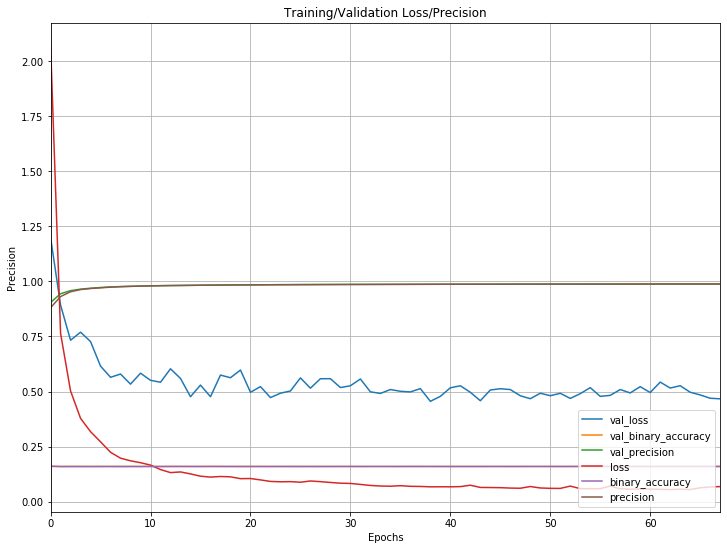

In [120]:
plot_history(predictions5)

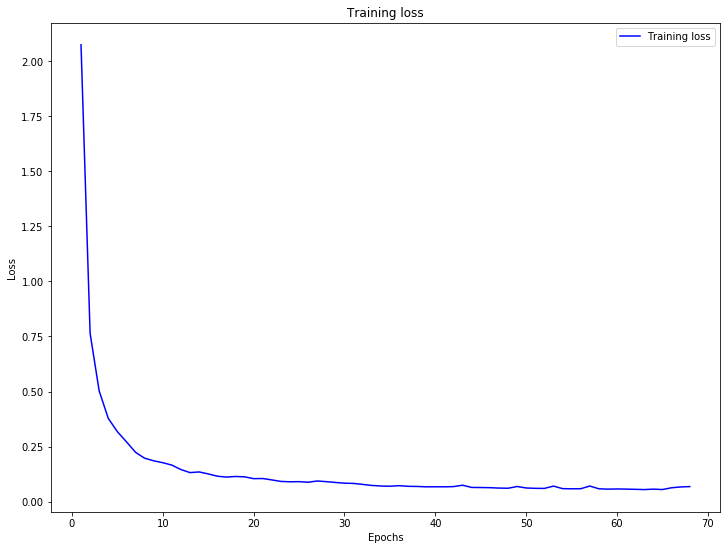

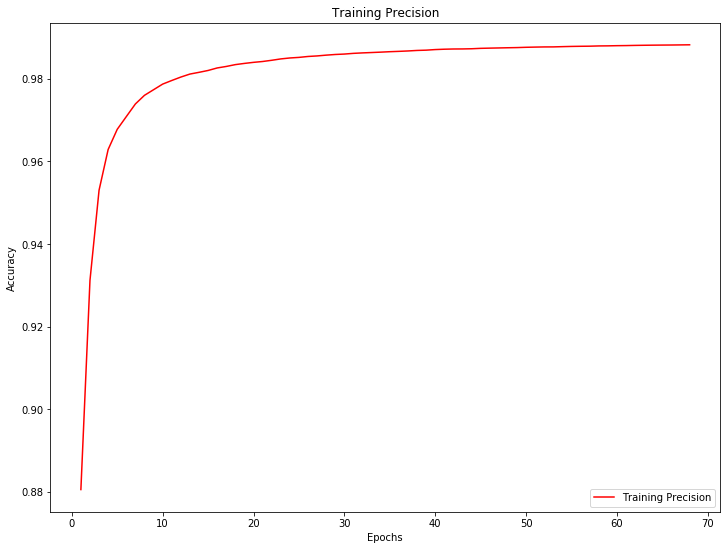

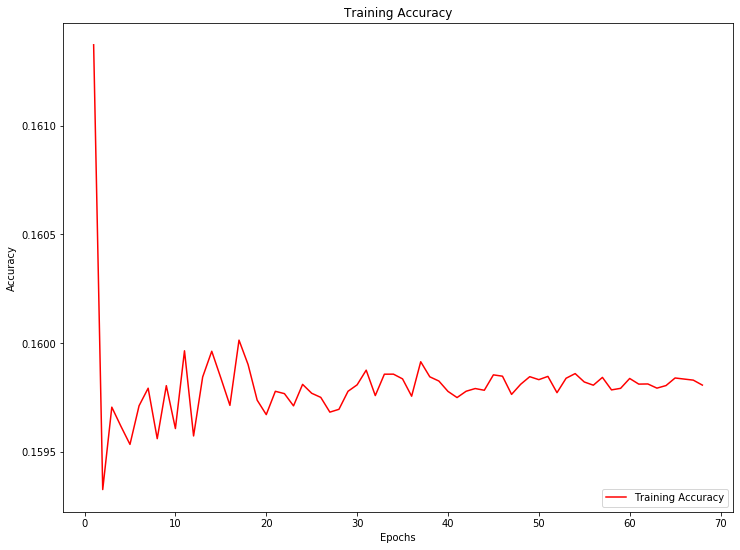

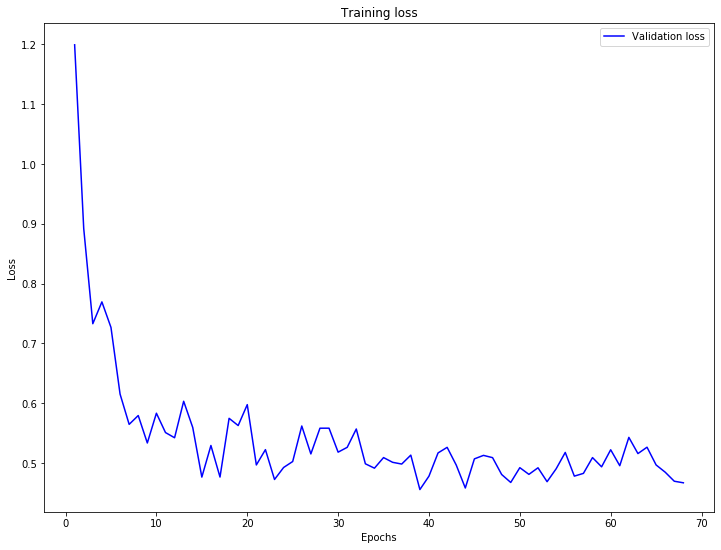

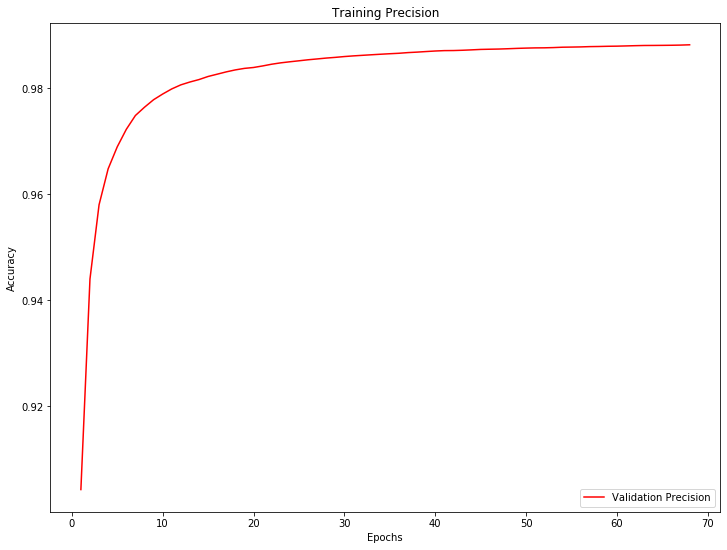

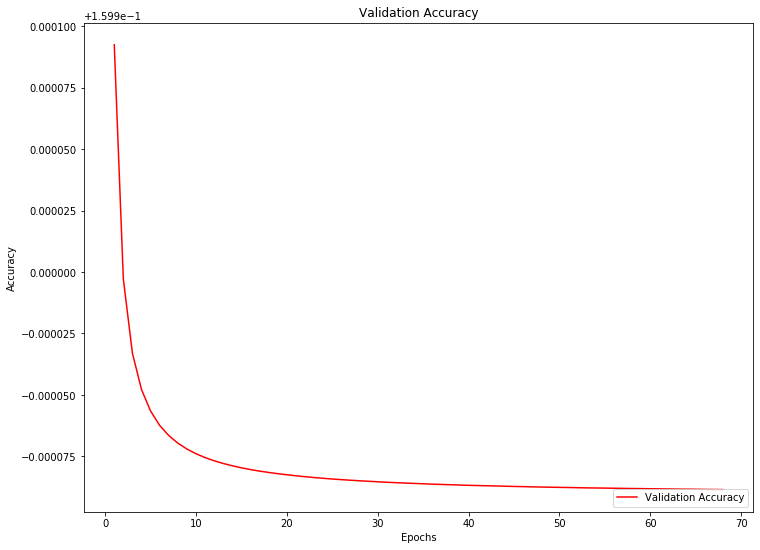

In [121]:
pre_loss_plot(model4_dict)

In [122]:
# Print the loss and accuracy for the training set 
results_train = model4.evaluate(X3_train, y3_train)
results_train

2449/2449 [==============================] - 0s 114us/step


[0.050306321331290337, 0.15989501774311066, 0.9882692694664001]

In [123]:
results_val = model4.evaluate(X3_val, y3_val)
results_val

273/273 [==============================] - 0s 112us/step


[0.46692569417394564, 0.15981365740299225, 0.9882944822311401]

In [124]:
# Output (probability) predictions for the train set 
y_hat_train = model4.predict(X3_train) 

In [125]:
# Print the loss and accuracy for the test set 
results_test = model4.evaluate(X3_test, y3_test)
results_test

681/681 [==============================] - 0s 111us/step


[0.4883508723825435, 0.1598214954137802, 0.9881254434585571]

In [126]:
# predict probabilities for test set
yhat_probs = model4.predict(X3_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(X3_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [127]:
get_metrics(y3_test, yhat_classes,yhat_probs)

Accuracy: 0.851689
Precision: 0.897133
Recall: 0.930070
F1 score: 0.913305
ROC AUC: 0.822921
[[ 48  61]
 [ 40 532]]


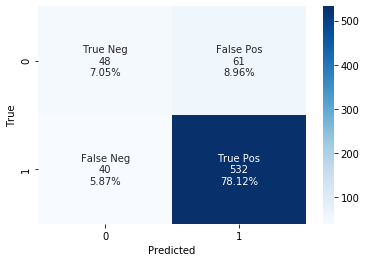

In [128]:
cm_nn(model4, X_test, y_test,yhat_classes)

# word2vec

In [130]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [131]:
maxlen=17

In [132]:
from gensim.models import Word2Vec 
import time

start_time = time.time()

In [133]:
lb = LabelBinarizer()
y = pd.DataFrame()
y = lb.fit_transform(df['target'])


In [134]:
X= df['wordl'].copy()

In [135]:
train_corpus = df['wordl'].copy()
size=100
## create list of lists of unigrams
corpus = []
for string in train_corpus:
   words = string.split()
   grams = [" ".join(words[i:i+1]) 
               for i in range(0, len(words), 1)]
   corpus.append(grams)

## detect bigrams 
bigrams_detector = gensim.models.phrases.Phrases(corpus, 
                delimiter=" ".encode(), min_count=5, threshold=6)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)


In [136]:
wv_nlp_model_file = 'nlp_' + 'word2vec_' + str(size) + '.model'
wv_nlp_model = Word2Vec(corpus,  min_count=1,
                     window=3,
                     size=100,
                     sg=1,
                     workers=5)
print("Time taken to train word2vec nlp model: " + str(time.time() - start_time))
wv_nlp_model.save(wv_nlp_model_file)

Time taken to train word2vec nlp model: 1.3303172588348389


In [137]:

## tokenize text
tokenizer = Tokenizer(split=' ', 
                      )
tokenizer.fit_on_texts(corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
text2seq= tokenizer.texts_to_sequences(corpus)
## padding sequence
X = pad_sequences(text2seq, 
                    maxlen=maxlen+1, padding="post", truncating="post")

In [138]:
vocab_size = (len(dic_vocabulary)+1)
vocab_size

5070

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     df['target'], 
                                                     random_state=42,
                                                     test_size=.2, stratify=y)

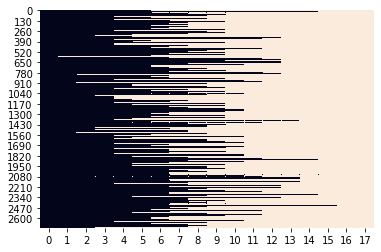

In [140]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [141]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, size))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  wv_nlp_model[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [142]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(df["wordl"].iloc[i].split())
print("from: ", df["wordl"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", df["wordl"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[df["wordl"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  hr tweeting rise dead need upgrade plugin station | len: 8
to:  [208  36 589  34   1   0   0   0   0   0   0   0   0   0   0   0   0   0] | len: 18
check:  hr  -- idx in vocabulary --> 1028
vocabulary:  {'store': 1, 'app': 2, 'not': 3, 'new': 4, 'pop': 5} ... (padding element, 0)


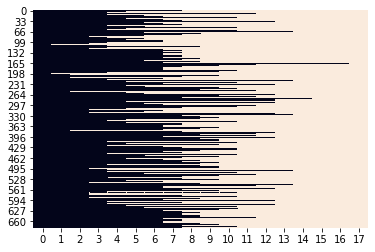

In [143]:
# plot heatmap for test data
sns.heatmap(X_test==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [144]:
word = "app"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")
print(embeddings.shape)
print(len(dic_vocabulary))

dic[word]: 2 |idx
embeddings[idx]: (100,) |vector
(5070, 100)
5069


In [145]:
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

Test label shape: (681,)
Train label shape: (2722,)
Test shape: (681, 18)
Train shape: (2722, 18)


In [146]:
regularizerA = keras.regularizers.l2(0.01)
regularizerB = keras.regularizers.l2(0.001)

In [147]:

modelw = models.Sequential()

## embedding
modelw.add(layers.Embedding(vocab_size, 300, input_length=maxlen+1, ))
                       
modelw.add(layers.BatchNormalization(momentum=0.8))
     
modelw.add(layers.Dense(200, activation='relu', ))  
#modelw.add(layers.BatchNormalization(momentum=0.6))
modelw.add(layers.Dense(44, activation='relu',  )) 
modelw.add(layers.GlobalAveragePooling1D()),
modelw.add(layers.Dense(1, activation='sigmoid'))
a_opt = optimizers.Adam(lr=1e-5,)

## compile
modelw.compile(loss='binary_crossentropy',
              optimizer=a_opt, metrics=[ba, precision])

modelw.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 18, 500)           2535000   
_________________________________________________________________
batch_normalization_9 (Batch (None, 18, 500)           2000      
_________________________________________________________________
dense_30 (Dense)             (None, 18, 200)           100200    
_________________________________________________________________
dense_31 (Dense)             (None, 18, 44)            8844      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 44)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 45        
Total params: 2,646,089
Trainable params: 2,645,089
Non-trainable params: 1,000
________________________________________

In [148]:
# early stopping to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=5)

#fit model
training = modelw.fit(X_train, y_train, 
                     epochs=300,
                     batch_size=96,
                     callbacks=[es_callback], 
                     validation_split=0.10,
                     shuffle=True,
                     verbose=0
                     )

In [149]:
modelw_dict = training.history
modelw_dict.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'val_precision', 'loss', 'binary_accuracy', 'precision'])

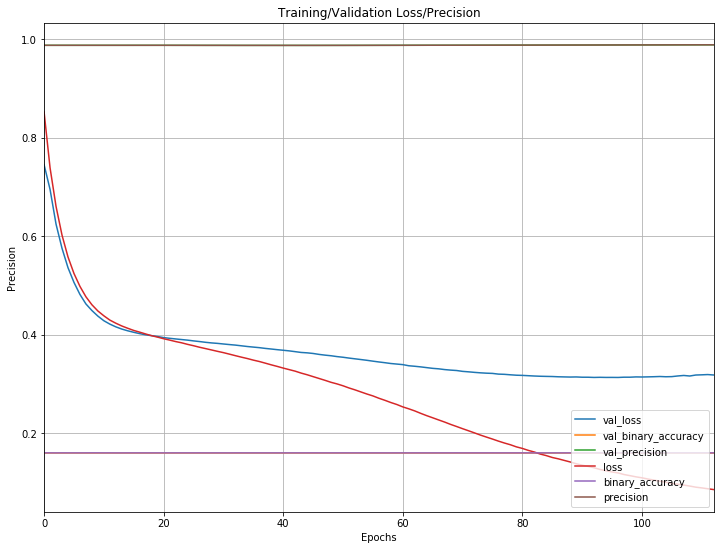

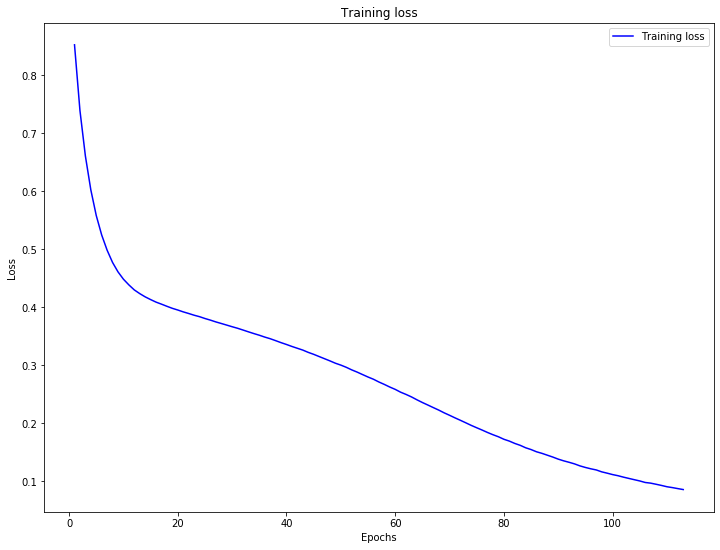

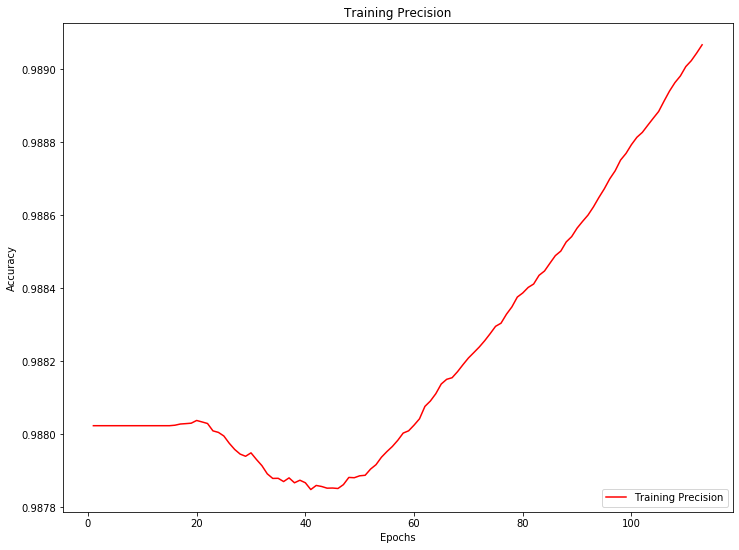

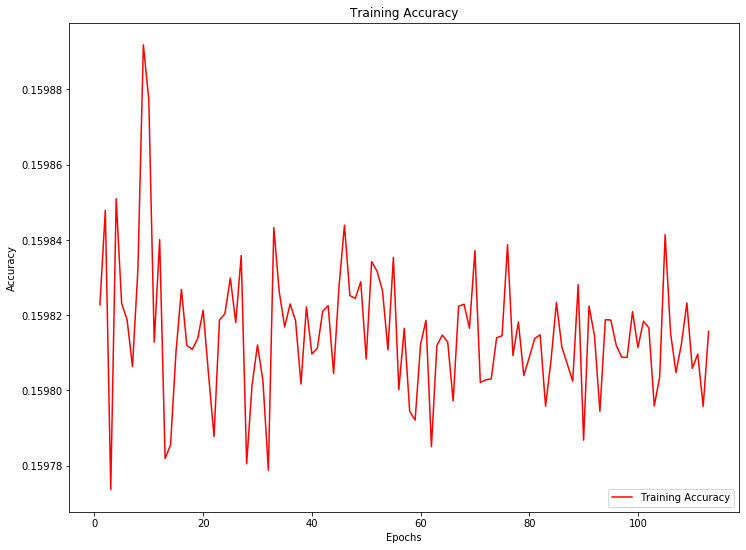

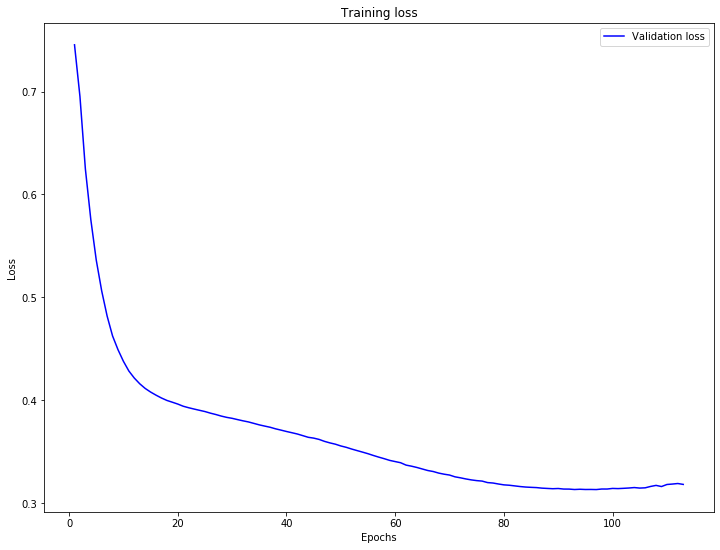

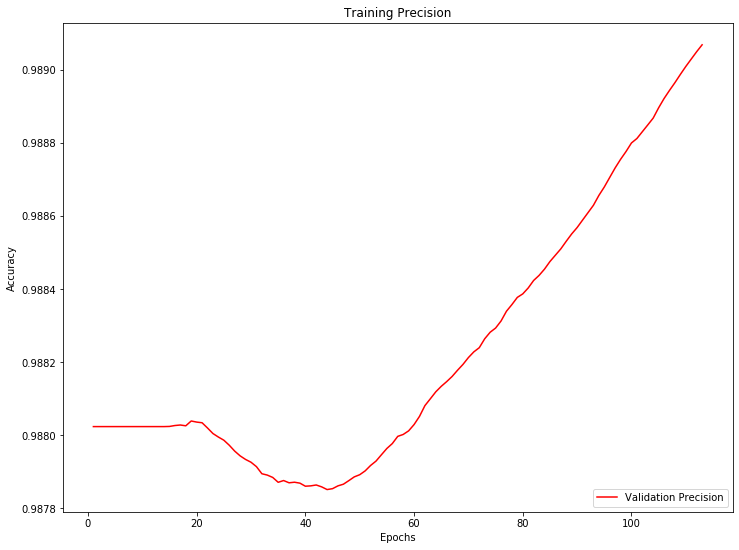

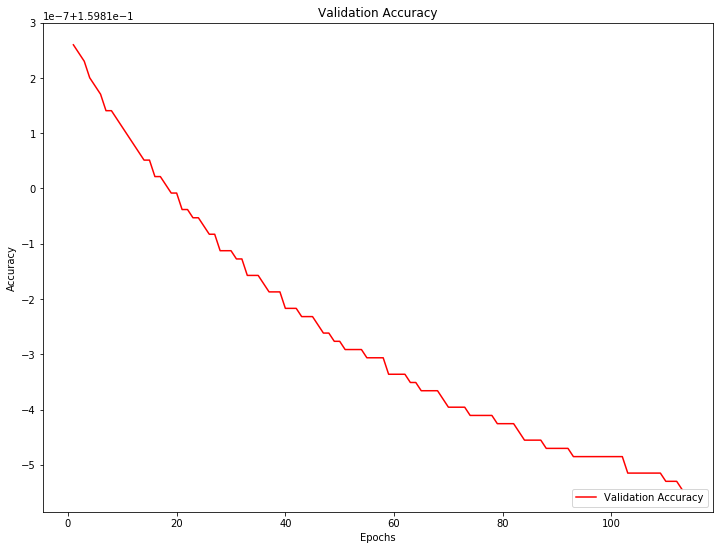

In [150]:
plot_history(training)
pre_loss_plot(modelw_dict)


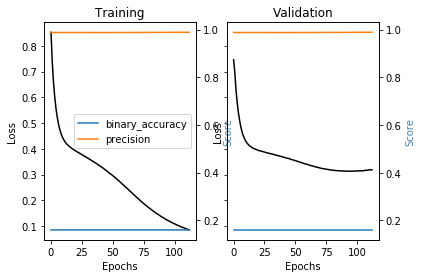

In [151]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])


metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:

    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [152]:
results_train = modelw.evaluate(X_train, y_train)
print('Training:', results_train)

results_test = modelw.evaluate(X_test, y_test)
print('Test:', results_test)
    

2722/2722 [==============================] - 0s 59us/step
Training: [0.10659388037949998, 0.1598096340894699, 0.9890847206115723]
681/681 [==============================] - 0s 55us/step
Test: [0.3084082582010922, 0.1598140150308609, 0.9890395998954773]


In [153]:
# predict probabilities for test set
yhat_probs = modelw.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = modelw.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
get_metrics(y_test, yhat_classes,yhat_probs)

Accuracy: 0.875184
Precision: 0.890851
Recall: 0.970280
F1 score: 0.928870
ROC AUC: 0.858528
[[ 41  68]
 [ 17 555]]


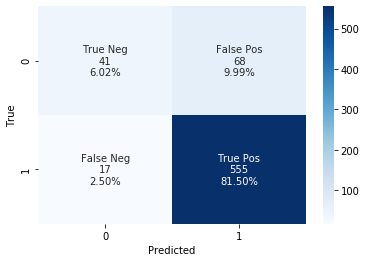

In [154]:
cm_nn(modelw, X_test, y_test,yhat_classes)

In [155]:
vocab = list(wv_nlp_model.wv.vocab)
Xwv = wv_nlp_model [wv_nlp_model.wv.vocab]
df_wv =pd.DataFrame(Xwv)

print(len(df_wv))

df_wv.shape

vocab, vectors = wv_nlp_model.wv.vocab, wv_nlp_model.wv.vectors

# get node name and embedding vector index.
name_index = np.array([(v[0], v[1].index) for v in vocab.items()])

# init dataframe using embedding vectors and set index as node name
wvector_df =  pd.DataFrame(vectors[name_index[:,1].astype(int)])
wvector_df.index = name_index[:, 0]
wvector_df.to_csv("embedding.csv")

5069


In [156]:
wvector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
hr,0.005077,-0.008911,0.013240,0.000435,0.007622,0.016257,0.003734,0.003460,-0.009467,0.013961,...,0.020287,0.005590,0.011194,0.022435,-0.009582,0.008060,0.012408,0.021353,-0.003749,-0.016833
tweeting,0.046467,-0.050750,0.079374,0.001950,0.025286,0.089616,0.000109,-0.003242,-0.033959,0.098971,...,0.088287,0.051013,0.073755,0.092133,-0.059555,0.011822,0.068337,0.091593,-0.005846,-0.079419
rise,0.022991,-0.020132,0.041483,0.003268,0.009702,0.048982,-0.005182,0.005562,-0.020580,0.052747,...,0.044225,0.027670,0.043698,0.054907,-0.033677,0.007803,0.042148,0.050160,-0.001413,-0.040199
dead,0.017060,-0.019407,0.031290,0.001247,0.005867,0.037353,0.000052,-0.002672,-0.011053,0.036346,...,0.031743,0.023320,0.027644,0.037278,-0.022443,0.003314,0.025994,0.036338,-0.006151,-0.029834
need,0.125470,-0.121649,0.214590,-0.004796,0.059848,0.247815,-0.002582,0.000618,-0.075181,0.243249,...,0.216458,0.129150,0.185015,0.244713,-0.156426,0.042634,0.178399,0.220239,-0.023537,-0.206980


In [157]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                    
import plotly


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=42)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True, ):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels,)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


In [158]:
x_vals, y_vals, labels = reduce_dimensions(wv_nlp_model)
plot_with_plotly(x_vals, y_vals, labels)


neural networks models are all overfitting to training data in some capacity. attempted making neural network smaller, applied bias, kernel initializers, l1 and l2 regularizers, batch normalization layers, and dropout layers to minimize loss providing slightly better results but still overfitting occurs to provide accuracy on training data and validation data. Accuracy is also relatively high when running test data. this is due to unbalanced data where majority is positive. SMOTE doesn't work great due to heavy overlapping in datapoints as seen in PCA scatter plot. this occurs on smote balanced data as well as data ran with weights provided. More data should be obtained to improve results. further assessment planned on retweets and hashtags relativity to sentiment.
